In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Polynomial fit 

This is a toy problem where we fit a quadratic function on a polynomial to find the coefficients of the quadratic function. The underlying function for which we are trying to compute the fit is $4 - t + \frac{1}{2}t^2$.

In [38]:
def polynomial(t,v=-1,a=1):
    """
    METHOD: this function outputs 4-t+0.5t^2 for an array of supplied t values

    INPUT: 
    ------
    t: values of time (numpy array)
    a: acceleration value (float)
    v: initial velocity (float)
    
    OUTPUT: 
    -------
    returns the value of the polynomial
    """
    return 4 + v*t + (0.5*a*t**2)

### Plotting to check the true function and a trial function with different value of the coefficient

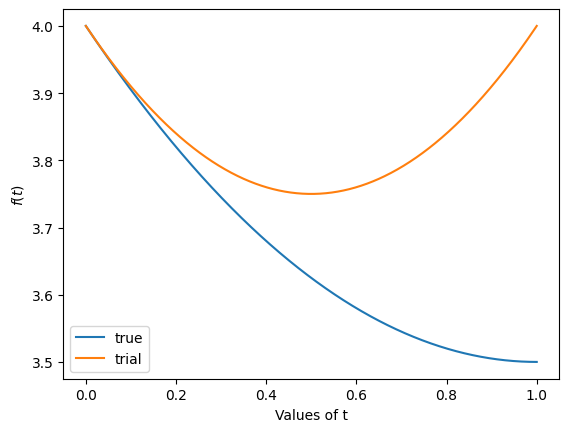

In [39]:
times = np.linspace(0,1,1000)
x_vals_true = polynomial(times)
plt.plot(times, x_vals_true, label = "true")
plt.plot(times, polynomial(times,a=2,v=-1), label = "trial")
plt.xlabel('Values of t')
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

In [40]:
def fitting(a_low, a_hi, v_low, v_hi, N):
    """
    METHOD: This function accepts the bounds of the `a` and `v` and the total number of grid points,
    constructs a grid on both the variables, and computes the fit of the polynomial function.

    INPUT:
    ------
    a_low: lowest range of acceleration value
    a_hi: highest range of acceleration value
    v_low: lowest range of velocity value
    v_hi: highest range of velocity value
    N: number of grid points

    OUTPUT:
    Returns the rms array and the best fit point.
    """
    a = np.linspace(a_low, a_hi,N)
    v = np.linspace(v_low, v_hi,N)
    rms = []
    grid_points = []
    for v_val in v:
        for a_val in a:
            x_trial = polynomial(times, v=v_val, a=a_val)
            diff = x_vals_true - x_trial
            rms.append(np.sqrt(np.mean(diff**2)))
            grid_points.append((a_val, v_val))
    rms = np.array(rms)
    a_fit, v_fit = grid_points[np.argmin(rms)]  
    return (a_fit, v_fit, rms, a, v)

### Here we invoke the fitting function to calculated the fitted values of `a`, `v`, the `rms` values on the grid, and the `grid_points` itself.

In [41]:
# Note that the left hand side has the exact same order of the variables as 
# the return function in the previous cell. That means `a_fit` returned from 
# the function will be saved in `fitted_a_val`, and so forth.
N = 500
fitted_a_vals, fitted_v_vals, rms_vals, a_grid_val, v_grid_val = fitting(-2, 2, -4, 4, N)

## This is Becky's version

In [42]:
def plotting(a_fit, v_fit, grid_points):
    """
    Plots the RMS array as a colormap.
    
    INPUT:
    ------
    a_fit: Best-fit acceleration
    v_fit: Best-fit velocity
    rms: Root mean square array
    grid_points: List of grid points

    OUTPUT: colormap
    """
    rms = []
    for a_val, v_val in grid_points:
        x_trial = polynomial(times, v=v_val, a=a_val)
        diff = x_vals_true - x_trial
        rms.append(np.sqrt(np.mean(diff**2)))
    rms = np.array(rms)
    
    A, V = np.meshgrid(a_fit, v_fit)
    rms_grid = rms.reshape((len(v_fit), len(a_fit)))
    plt.pcolormesh(A, V, rms_grid)
    plt.colorbar()
    plt.scatter(grid_points[np.argmin(rms)][0], grid_points[np.argmin(rms)][1])
    plt.show()

#how to use
#a_fit, v_fit, rms, grid_points = fitting(a_low, a_hi, v_low, v_hi, N)
#plotting(np.linspace(a_low, a_hi, N), np.linspace(v_low, v_hi, N), rms, grid_points)

## This is the version I created

In [43]:
def plotting(fitted_a_vals, fitted_v_vals, a_grid_val, v_grid_val, rms_vals, N=500):
    """
    Plots the RMS array as a colormap.
    
    INPUT:
    ------
    a_fit: Best-fit acceleration
    v_fit: Best-fit velocity
    rms: Root mean square array
    grid_points: List of grid points

    OUTPUT: colormap
    """
    A, V = np.meshgrid(a_grid_val, v_grid_val)
    rms_grid = rms_vals.reshape((N, N))
    plt.pcolormesh(A, V, rms_grid)
    plt.colorbar()
    plt.scatter(fitted_a_vals, fitted_v_vals)
    plt.xlabel('Value of a')
    plt.ylabel('Value of v')

    plt.show()

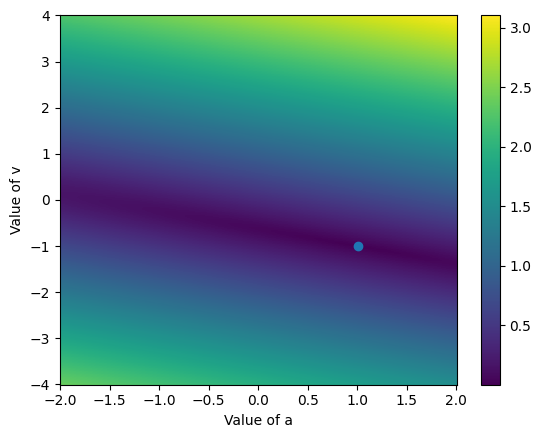

In [44]:
plotting(fitted_a_vals, fitted_v_vals, a_grid_val, v_grid_val, rms_vals)

----

## Systematic error in fitting data
Thus far we have assumed that the polynomial function we are trying to fit has the same degree as the trial function. This is true if we know the underlying physics that is responsible for the functional dependence. For example, in the above example we are assuming that we are observing a motion of a uniformly accelerated object. We know from the laws of kinematics that the displacement varies as a quadratic function of time $x(t) = x_0 + v_0t + \frac{1}{2}at^2$. Thus, it natural to use a quadratic trials functio nand then use that function for fitting to the data. However, in real life we might be dealing with a problem where the true function is not known accurately. We just have the data. Using the trial function that is inaccurate will result in error in the estimation of the true parameters. In this example we will be changing the function that generates the data. We do that by slightly modifying the quadratic function by adding weak cubic function.

In [45]:
def modified_polynomial(t, v=-1, a=1, b=0.01):
    """
    METHOD: this function outputs 4-t+0.5t^2 for an array of supplied t values

    INPUT: 
    ------
    t: values of time (numpy array)
    a: acceleration value (float)
    b: coefficient of cubic term
    v: initial velocity (float)
    
    OUTPUT: 
    -------
    returns the value of the polynomial
    """
    return 4 + v*t + (0.5*a*t**2) + b*(t**3)

### Task 1: 
Plot the function for `times = np.linspace(0,1,1000)` for `b=0.01` and for `b=0`

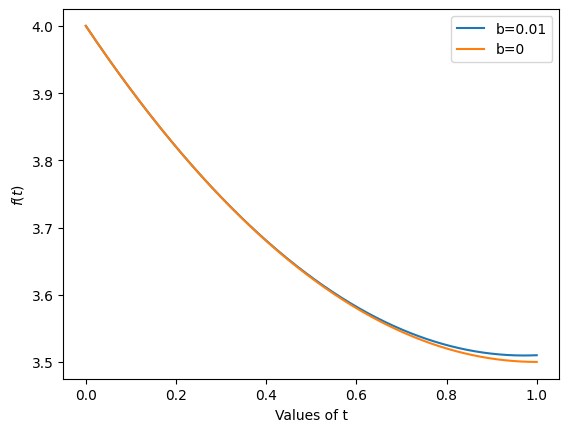

In [46]:
times = np.linspace(0,1,1000)
plt.plot(times, modified_polynomial(times, v=-1, a=1, b=0.01), label = "b=0.01")
plt.plot(times, modified_polynomial(times, v=-1, a=1, b=0), label = "b=0")
plt.xlabel('Values of t')
plt.ylabel('$f(t)$')
plt.legend()
plt.show()

### Task 2:
Now use the fitting script developed above to fit this new data (using `b=0.01`) using a quadratic fit. 
1. What is the error in the fitted parameters?
2. How does the fitting error evolve as we increase the fineness of the gid (increasing value of `N`)
3. Now, if we fix the value of `N` (number of grid points) to `500`. how does the fitting error vary with the variation of the value of `b`? We expect error in the fitting will increase with increasing values of `b`. 

Note that we will have two plots in each case, one for each of the parameters `v` and `a.`

In [174]:
def modified_fitting(a_low, a_hi, v_low, v_hi, b, N):
    """
    METHOD: This function accepts the bounds of the `a` and `v` and the total number of grid points,
    constructs a grid on both the variables, and computes the fit of the modified polynomial function.

    INPUT:
    ------
    a_low: lowest range of acceleration value
    a_hi: highest range of acceleration value
    v_low: lowest range of velocity value
    v_hi: highest range of velocity value
    b: coefficient of cubic term
    N: number of grid points

    OUTPUT:
    Returns the fitted parameters (a_fit, v_fit), rms array, and the grid points.
    """
    a = np.linspace(a_low, a_hi, N)
    v = np.linspace(v_low, v_hi, N)
    rms = []
    grid_points = []
    for v_val in v:
        for a_val in a:
            x_trial = modified_polynomial(times, v=v_val, a=a_val, b=b)
            diff = x_vals_true - x_trial
            rms.append(np.sqrt(np.mean(diff**2)))
            grid_points.append((a_val, v_val))
    rms = np.array(rms)
    best_index = np.argmin(rms)
    a_fit, v_fit = grid_points[best_index]
    return a_fit, v_fit, rms, a, v, a_low, a_hi, v_low, v_hi, b 

N = 500
fitted_a_vals, fitted_v_vals, rms_vals, a_grid_val, v_grid_val, _, _, _, _, b = modified_fitting(-2, 2, -4, 4, 0.01, N)
fitting_errors_a_N, fitting_errors_v_N = evaluate_fitting_error_with_grid_fineness(N_values, a_true, v_true, b, N_default=500)
a_true = (a_low + a_hi) / 2
v_true = (v_low + v_hi) / 2

ValueError: too many values to unpack (expected 5)

In [ ]:
def modified_plotting(fitted_a_vals, fitted_v_vals, a_grid_val, v_grid_val, rms_vals, N=500):
    """
    Plots the RMS array as a colormap.

    INPUT:
    ------
    fitted_a_vals: List of fitted acceleration values
    fitted_v_vals: List of fitted velocity values
    a_grid_val: Grid values of acceleration
    v_grid_val: Grid values of velocity
    rms_vals: Root mean square array
    N: number of grid points

    OUTPUT: Colormap plot
    """
    A, V = np.meshgrid(a_grid_val, v_grid_val)
    rms_grid = rms_vals.reshape((N, N))
    plt.pcolormesh(A, V, rms_grid)
    plt.colorbar()
    plt.scatter(fitted_a_vals, fitted_v_vals, color='red')
    plt.xlabel('Value of a')
    plt.ylabel('Value of v')
    plt.show()

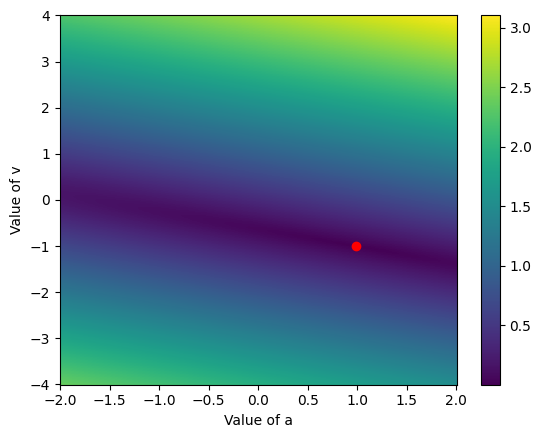

In [168]:
modified_plotting(fitted_a_vals, fitted_v_vals, a_grid_val, v_grid_val, rms_vals)

In [169]:
"""
1
"""
def calculate_parameter_errors(fitted_values, true_values):
    errors = np.abs(np.array(fitted_values) - np.array(true_values))
    return errors

In [170]:
"""
2
"""
def evaluate_fitting_error_with_grid_fineness(N_values, a_true, v_true, b, N_default=500):
    fitting_errors_a = []
    fitting_errors_v = []
    for N in N_values:
        fitted_a_vals, fitted_v_vals, rms_vals, _, _ = modified_fitting(-2, 2, -4, 4, b, N)
        error_a = calculate_parameter_errors(fitted_a_vals, a_true)
        error_v = calculate_parameter_errors(fitted_v_vals, v_true)
        fitting_errors_a.append(np.mean(error_a))
        fitting_errors_v.append(np.mean(error_v))
    return fitting_errors_a, fitting_errors_v
    
N_values = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
fitting_errors_a_N, fitting_errors_v_N = evaluate_fitting_error_with_grid_fineness(N_values, a_true, v_true, b, N_default=500)
plt.plot(N_values, fitting_errors_a_N, label='Fitting Error in a')
plt.plot(N_values, fitting_errors_v_N, label='Fitting Error in v')
plt.xlabel('Number of Grid Points (N)')
plt.ylabel('Fitting Error')
plt.title('Fitting Error vs Grid Fineness')
plt.legend()
plt.show()

NameError: name 'b' is not defined

In [ ]:
"""
3
"""
def evaluate_fitting_error_with_b_values(b_values, a_true, v_true, N=500):
    fitting_errors_a = []
    fitting_errors_v = []
    for b in b_values:
        fitted_a_vals, fitted_v_vals, _, _, _ = modified_fitting(-2, 2, -4, 4, b, N)
        error_a = calculate_parameter_errors(fitted_a_vals, a_true)
        error_v = calculate_parameter_errors(fitted_v_vals, v_true)
        fitting_errors_a.append(np.mean(error_a))
        fitting_errors_v.append(np.mean(error_v))
    return fitting_errors_a, fitting_errors_v

b_values = [0.01, 0.02, 0.03, 0.04, 0.05]
fitting_errors_a_b, fitting_errors_v_b = evaluate_fitting_error_with_b_values(b_values, a_true, v_true)
plt.plot(b_values, fitting_errors_a_b, label='Fitting Error in a')
plt.plot(b_values, fitting_errors_v_b, label='Fitting Error in v')
plt.xlabel('Value of b')
plt.ylabel('Fitting Error')
plt.title('Fitting Error vs b Values (N=500)')
plt.legend()
plt.show()